In [39]:
import numpy as np
Polynomial = np.polynomial.Polynomial
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

**Задание 1**

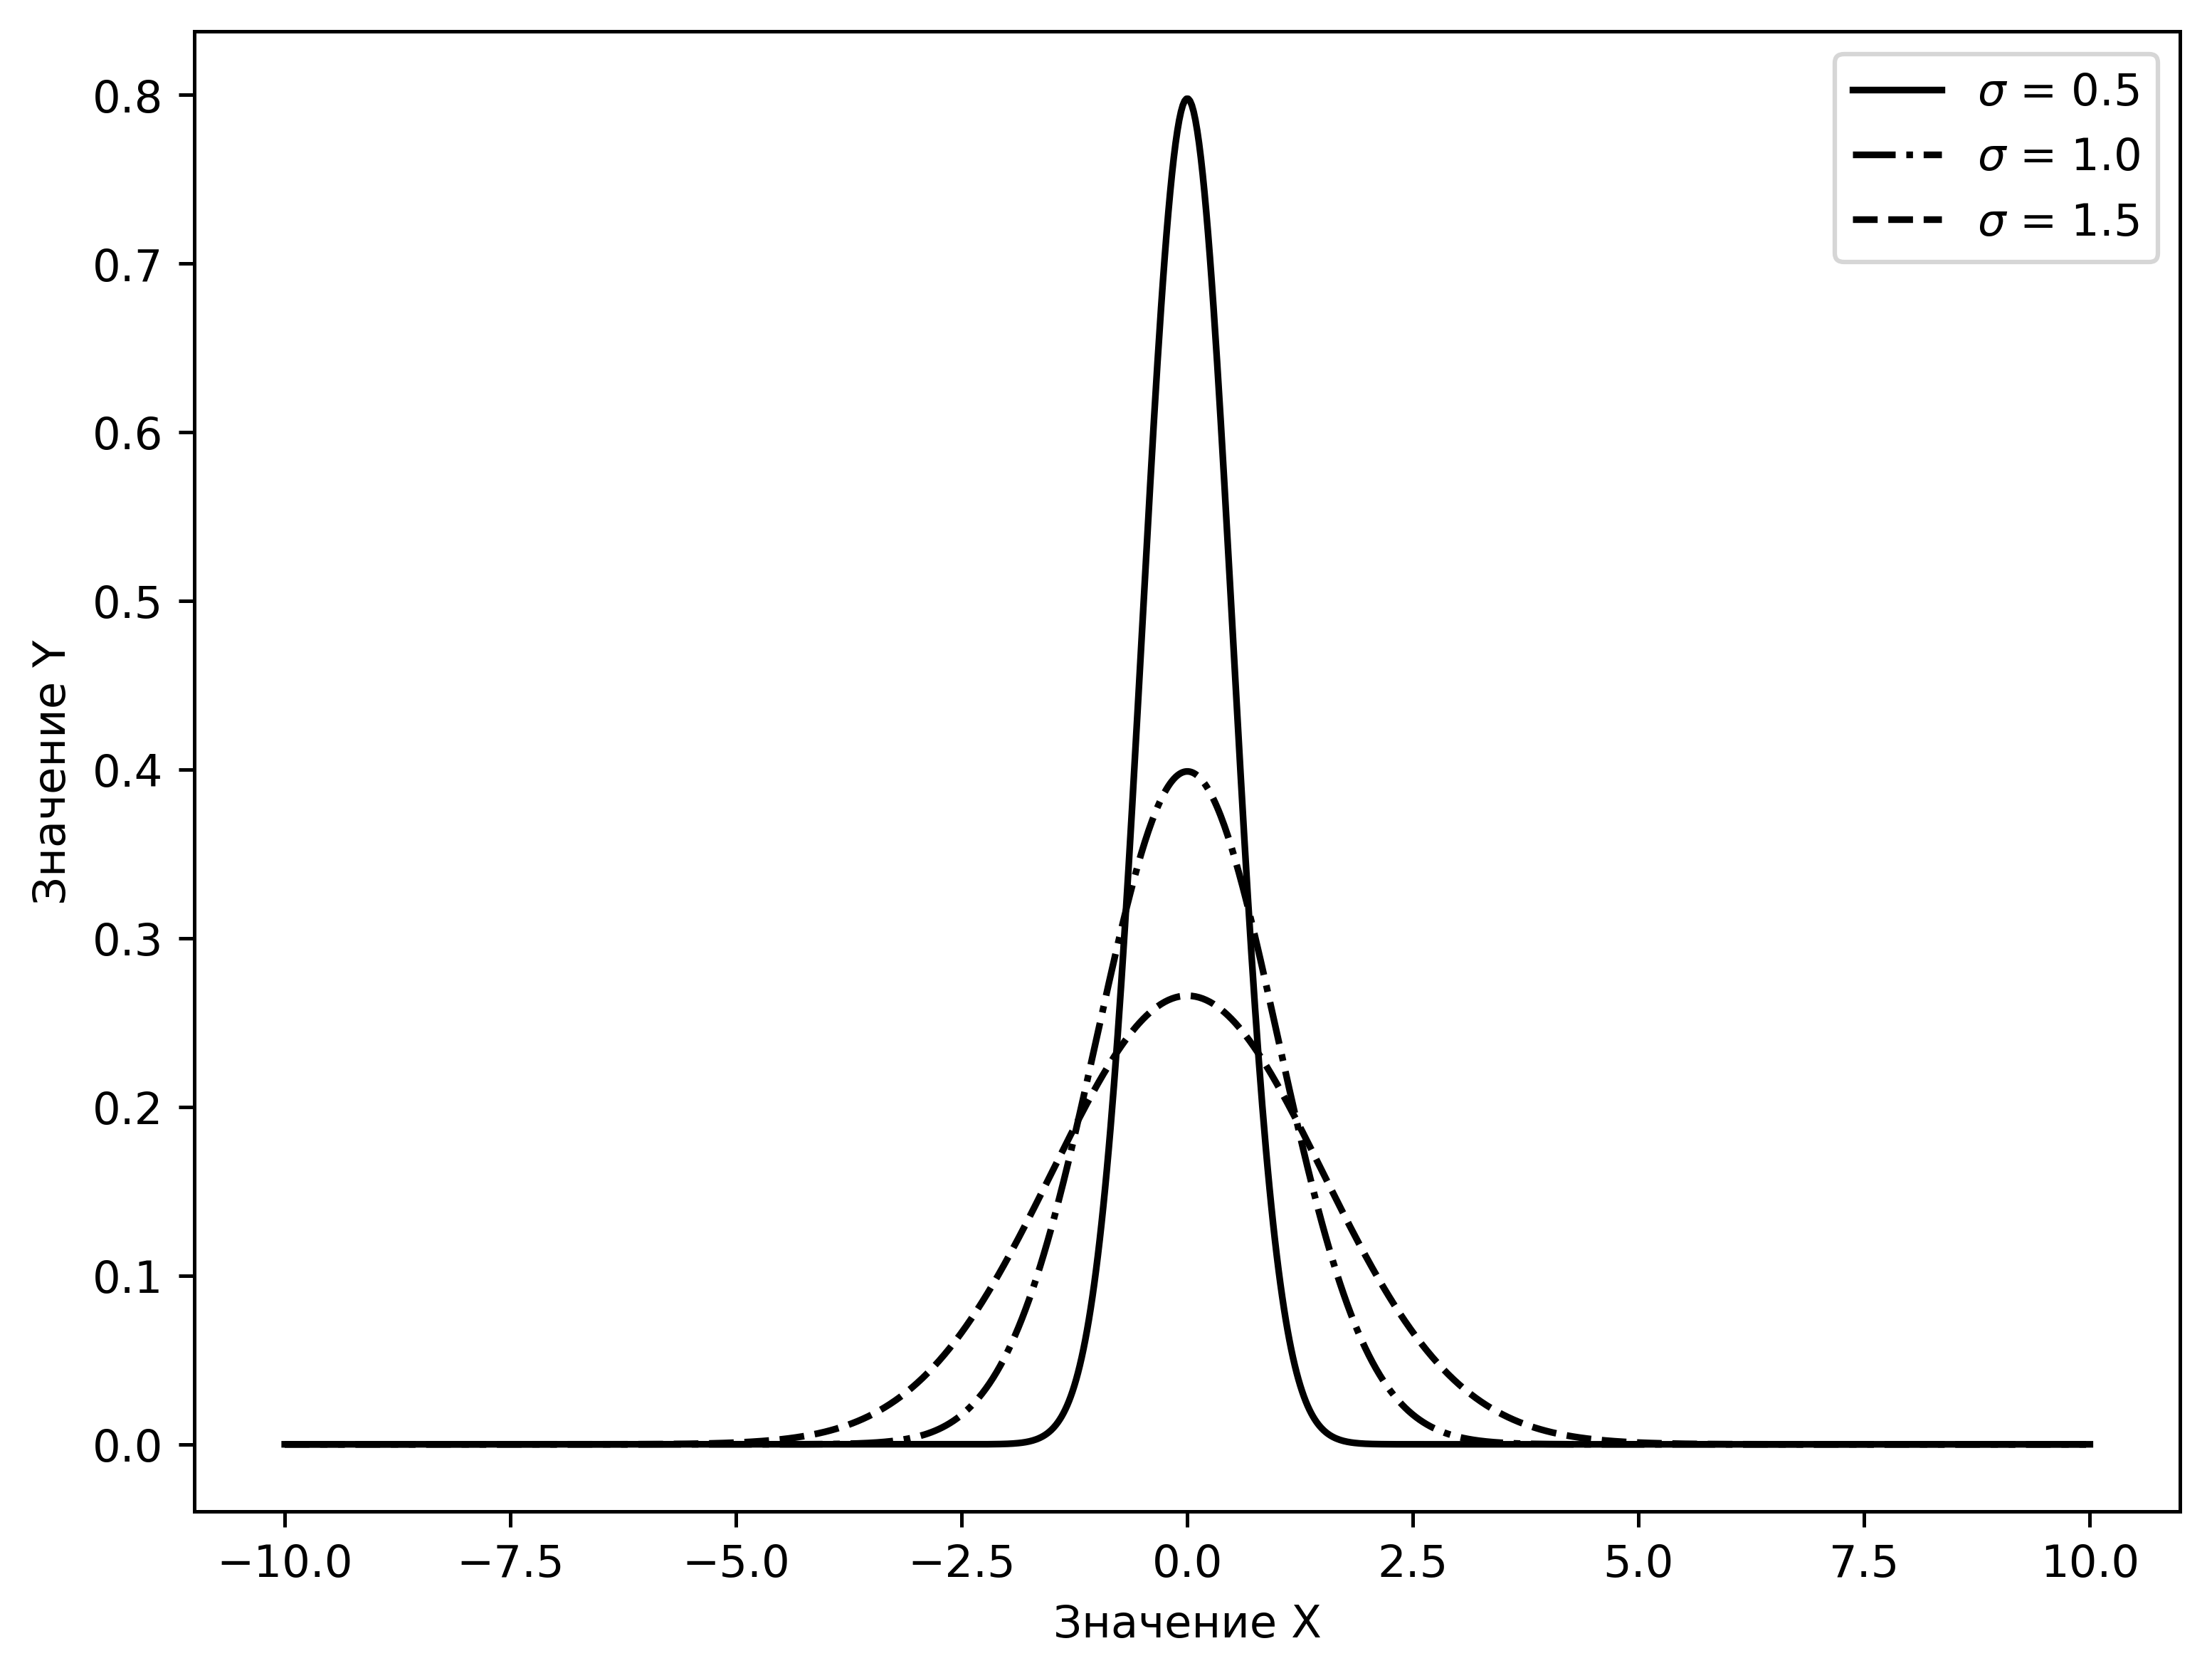

In [42]:
def gauss(mu: float,
          sig_square: list,
          x_start: float,
          x_end: float) -> np.array:

    x = np.linspace(x_start, x_end, 1000)
    line_number = len(sig_square)

    res = np.ones((line_number, x.size),  dtype=float)

    for i in range(len(sig_square)):
        res[i] = 1 / (sig_square[i] * (2 * np.pi)**0.5) * np.exp(-(x - mu)**2 / (2 * sig_square[i]**2))

    return x, res

ss_list = [0.5, 1.0, 1.5]

x, y = gauss(0, ss_list, -10, 10)

fig = plt.figure(figsize = (8,6), dpi=450)
ax = fig.add_subplot()
ax.plot(x, y[0], 'k', label=f'$\sigma$ = {ss_list[0]}')
ax.plot(x, y[1], '-.k', label=f'$\sigma$ = {ss_list[1]}')
ax.plot(x, y[2], '--k', label=f'$\sigma$ = {ss_list[2]}')
ax.legend()
ax.set_ylabel('Значение Y')
ax.set_xlabel('Значение X');

**Задание 2**

Критическая температура аммиака 406.18 K
Критическое давление аммиака 11387 kPa

При Т = 298.00 K, p = 101 kPa:
Мольный объем жидкости = 2.43e-02 м3/моль
Мольный объем газа = 5.44e-05 м3/моль

При Т = 500.00 K, p = 12000 kPa:
Мольный объем жидкости = 2.72e-04 м3/моль
Мольный объем газа = 2.72e-04 м3/моль


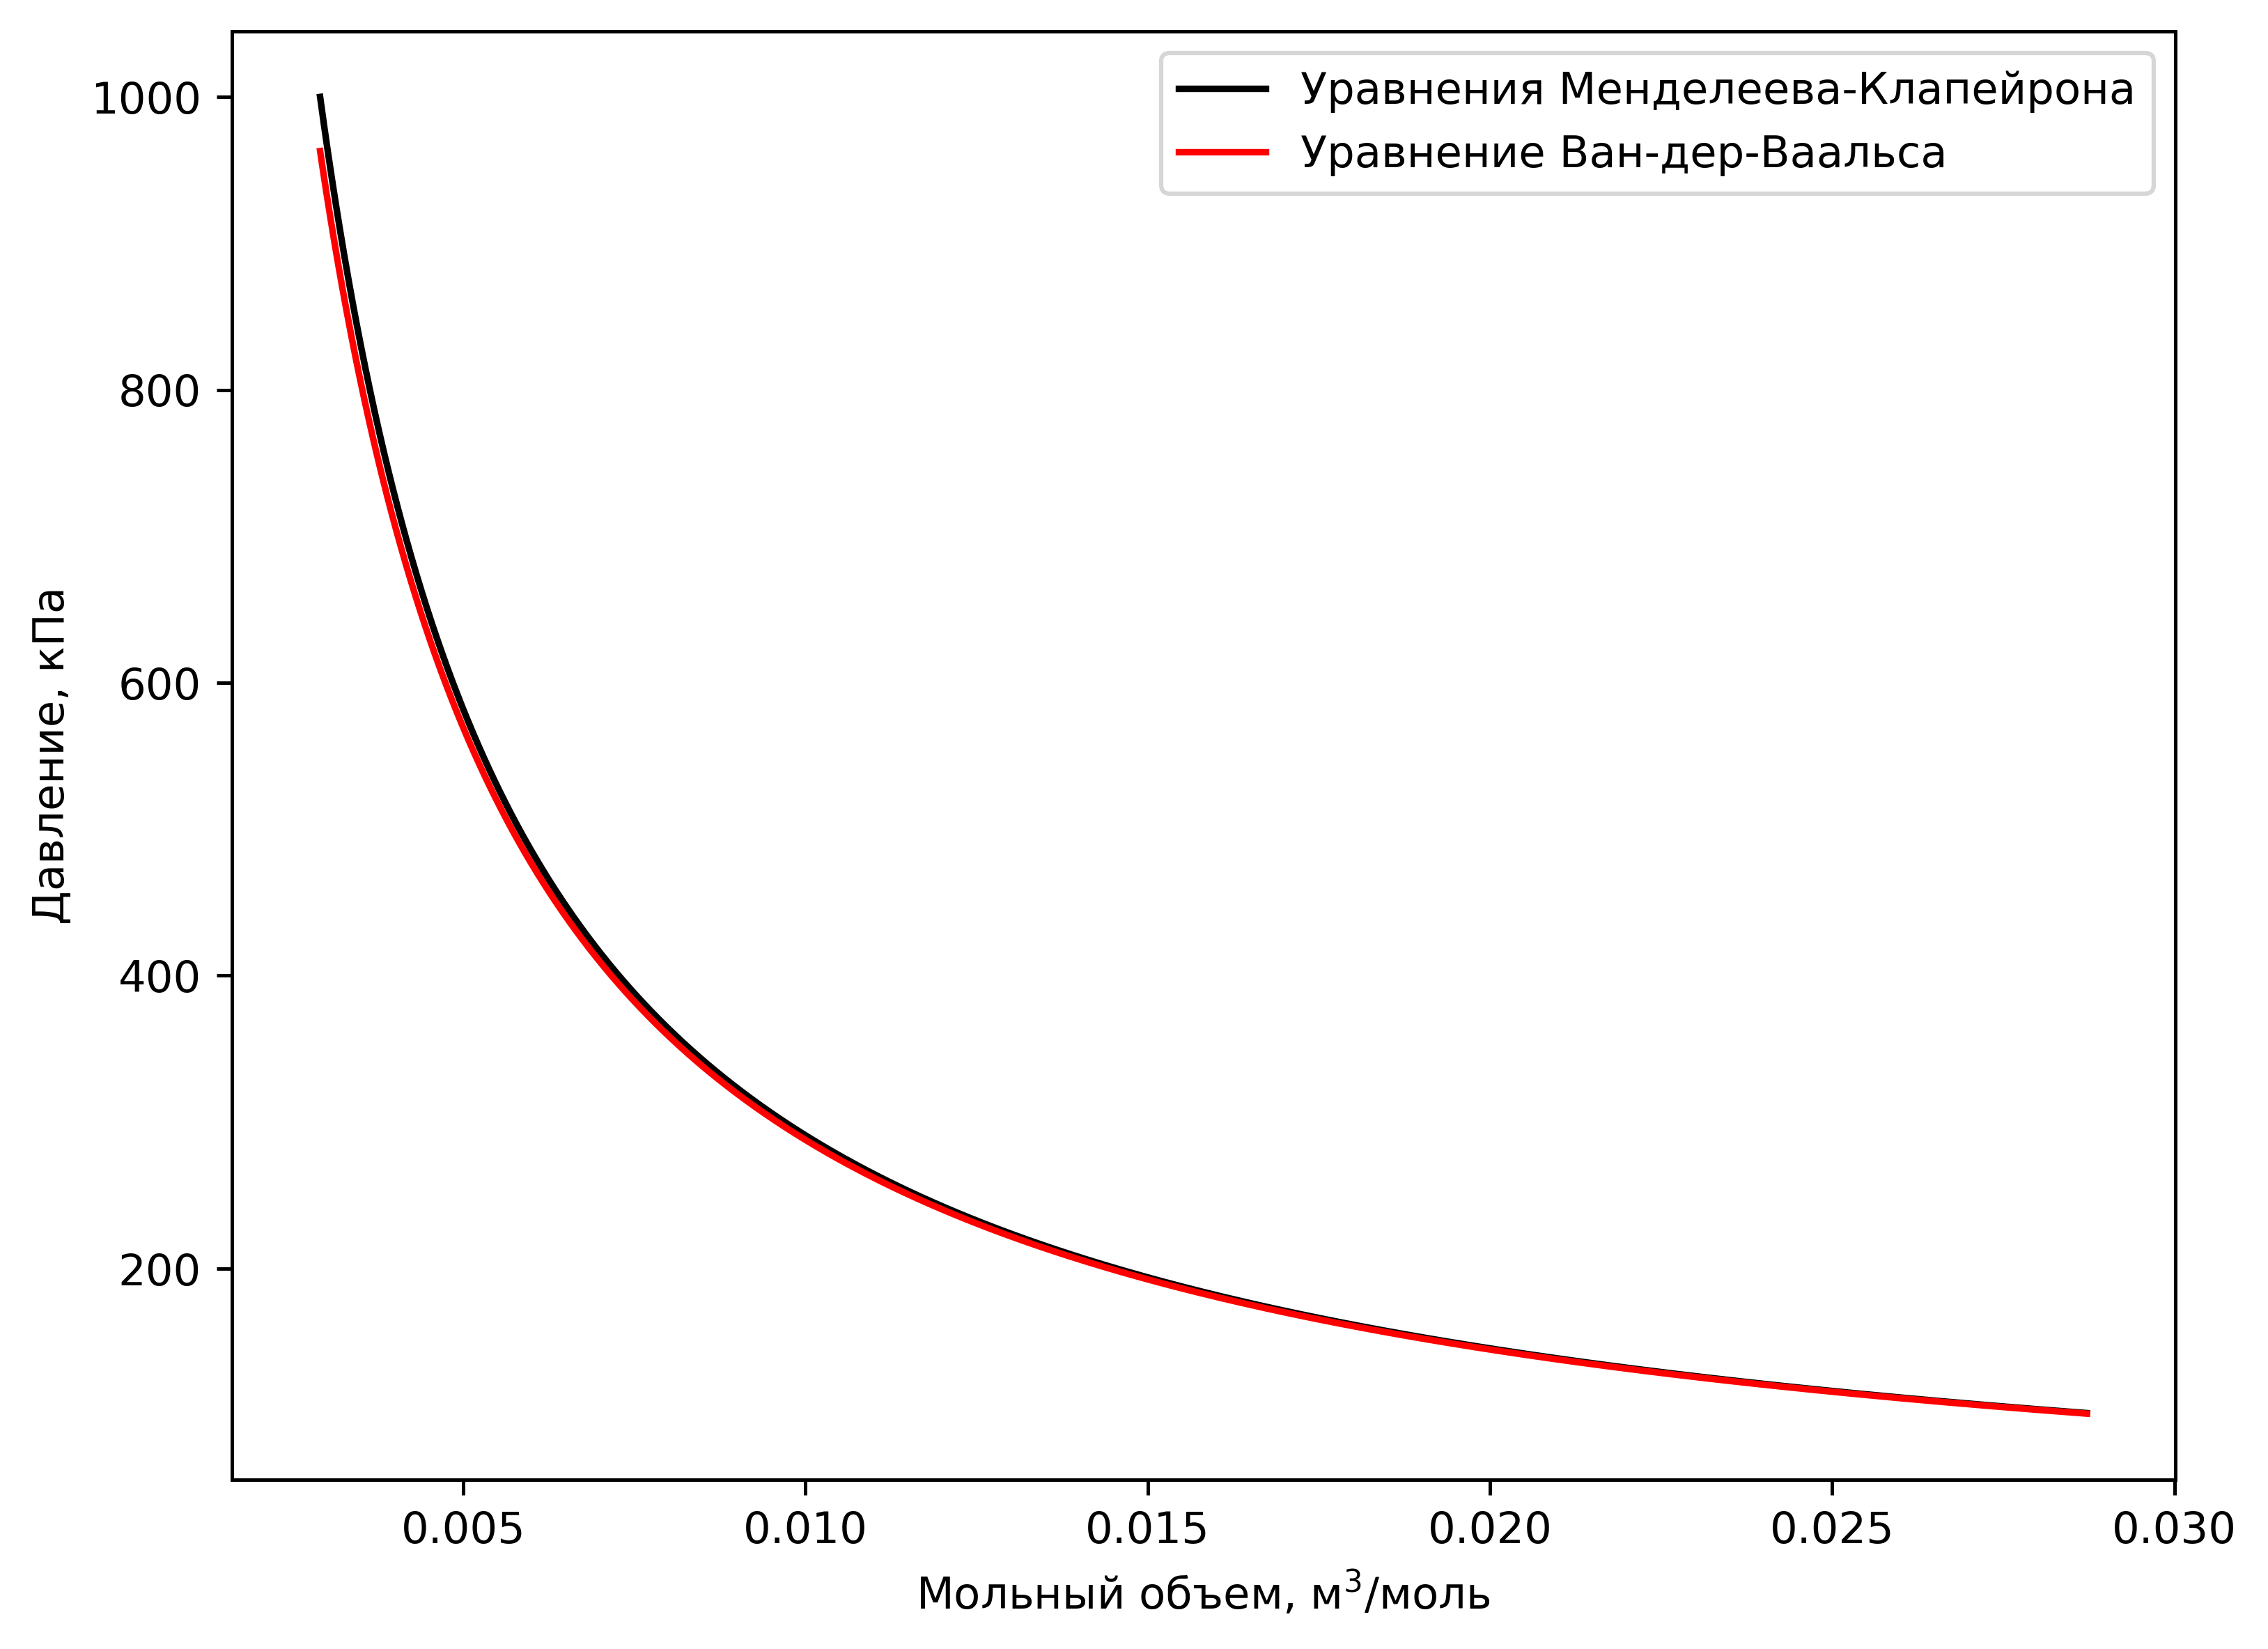

In [43]:
R = 8.314
a = 0.4225
b = 37.07E-6
tc = 8 * a / (27 * R * b)
pc = a / (27 * b**2)
print(f'Критическая температура аммиака {tc:.2f} K\
\nКритическое давление аммиака {pc/1000:.0f} kPa\n')

cond1 = [298, 101325]
cond2 = [500, 12E6]
poly1 = Polynomial([-a * b, a, -(cond1[1] * b + R * cond1[0]), cond1[1]])
poly2 = Polynomial([-a * b, a, -(cond2[1] * b + R * cond2[0]), cond2[1]])
roots1 = poly1.roots()
roots2 = poly2.roots()
def choose_roots(cond: list,
                roots: list) -> list:

    critical = False

    num_roots = roots.size
    mask = np.full((num_roots,), fill_value = True, dtype=bool)

    for i in range(num_roots):
        if np.imag(roots[i]) != 0:
            mask[i] = False
            critical = True

    if critical == False:
        vml = min(roots)
        vmv = max(roots)
    else:
        res = np.real(roots[mask][0])
        vmv, vml = res, res

    return vmv, vml

vmv1, vml1 = choose_roots(cond1, roots1)
vmv2, vml2 = choose_roots(cond2, roots2)

print(f'При Т = {cond1[0]:.2f} K, p = {cond1[1]/1000:.0f} kPa:\
\nМольный объем жидкости = {vmv1:.2e} м3/моль\
\nМольный объем газа = {vml1:.2e} м3/моль\
\n\nПри Т = {cond2[0]:.2f} K, p = {cond2[1]/1000:.0f} kPa:\
\nМольный объем жидкости = {vmv2:.2e} м3/моль\
\nМольный объем газа = {vml2:.2e} м3/моль')

p_ig = np.linspace(101325, 1000000, 1000)
T = 350
v_ig = R * T / p_ig
p_vander = R * T / (v_ig - b) - a / (v_ig**2)

fig = plt.figure(figsize = (8,6), dpi=450)
ax = fig.add_subplot()
ax.plot(v_ig, p_ig/1000, 'k', label='Уравнения Менделеева-Клапейрона')
ax.plot(v_ig, p_vander/1000, 'r', label='Уравнение Ван-дер-Ваальса')
ax.legend()
ax.set_ylabel('Давление, кПа')
ax.set_xlabel('Мольный объем, м$^3$/моль');

**Задание 3**

alpha = 0.39 л/(см·моль)


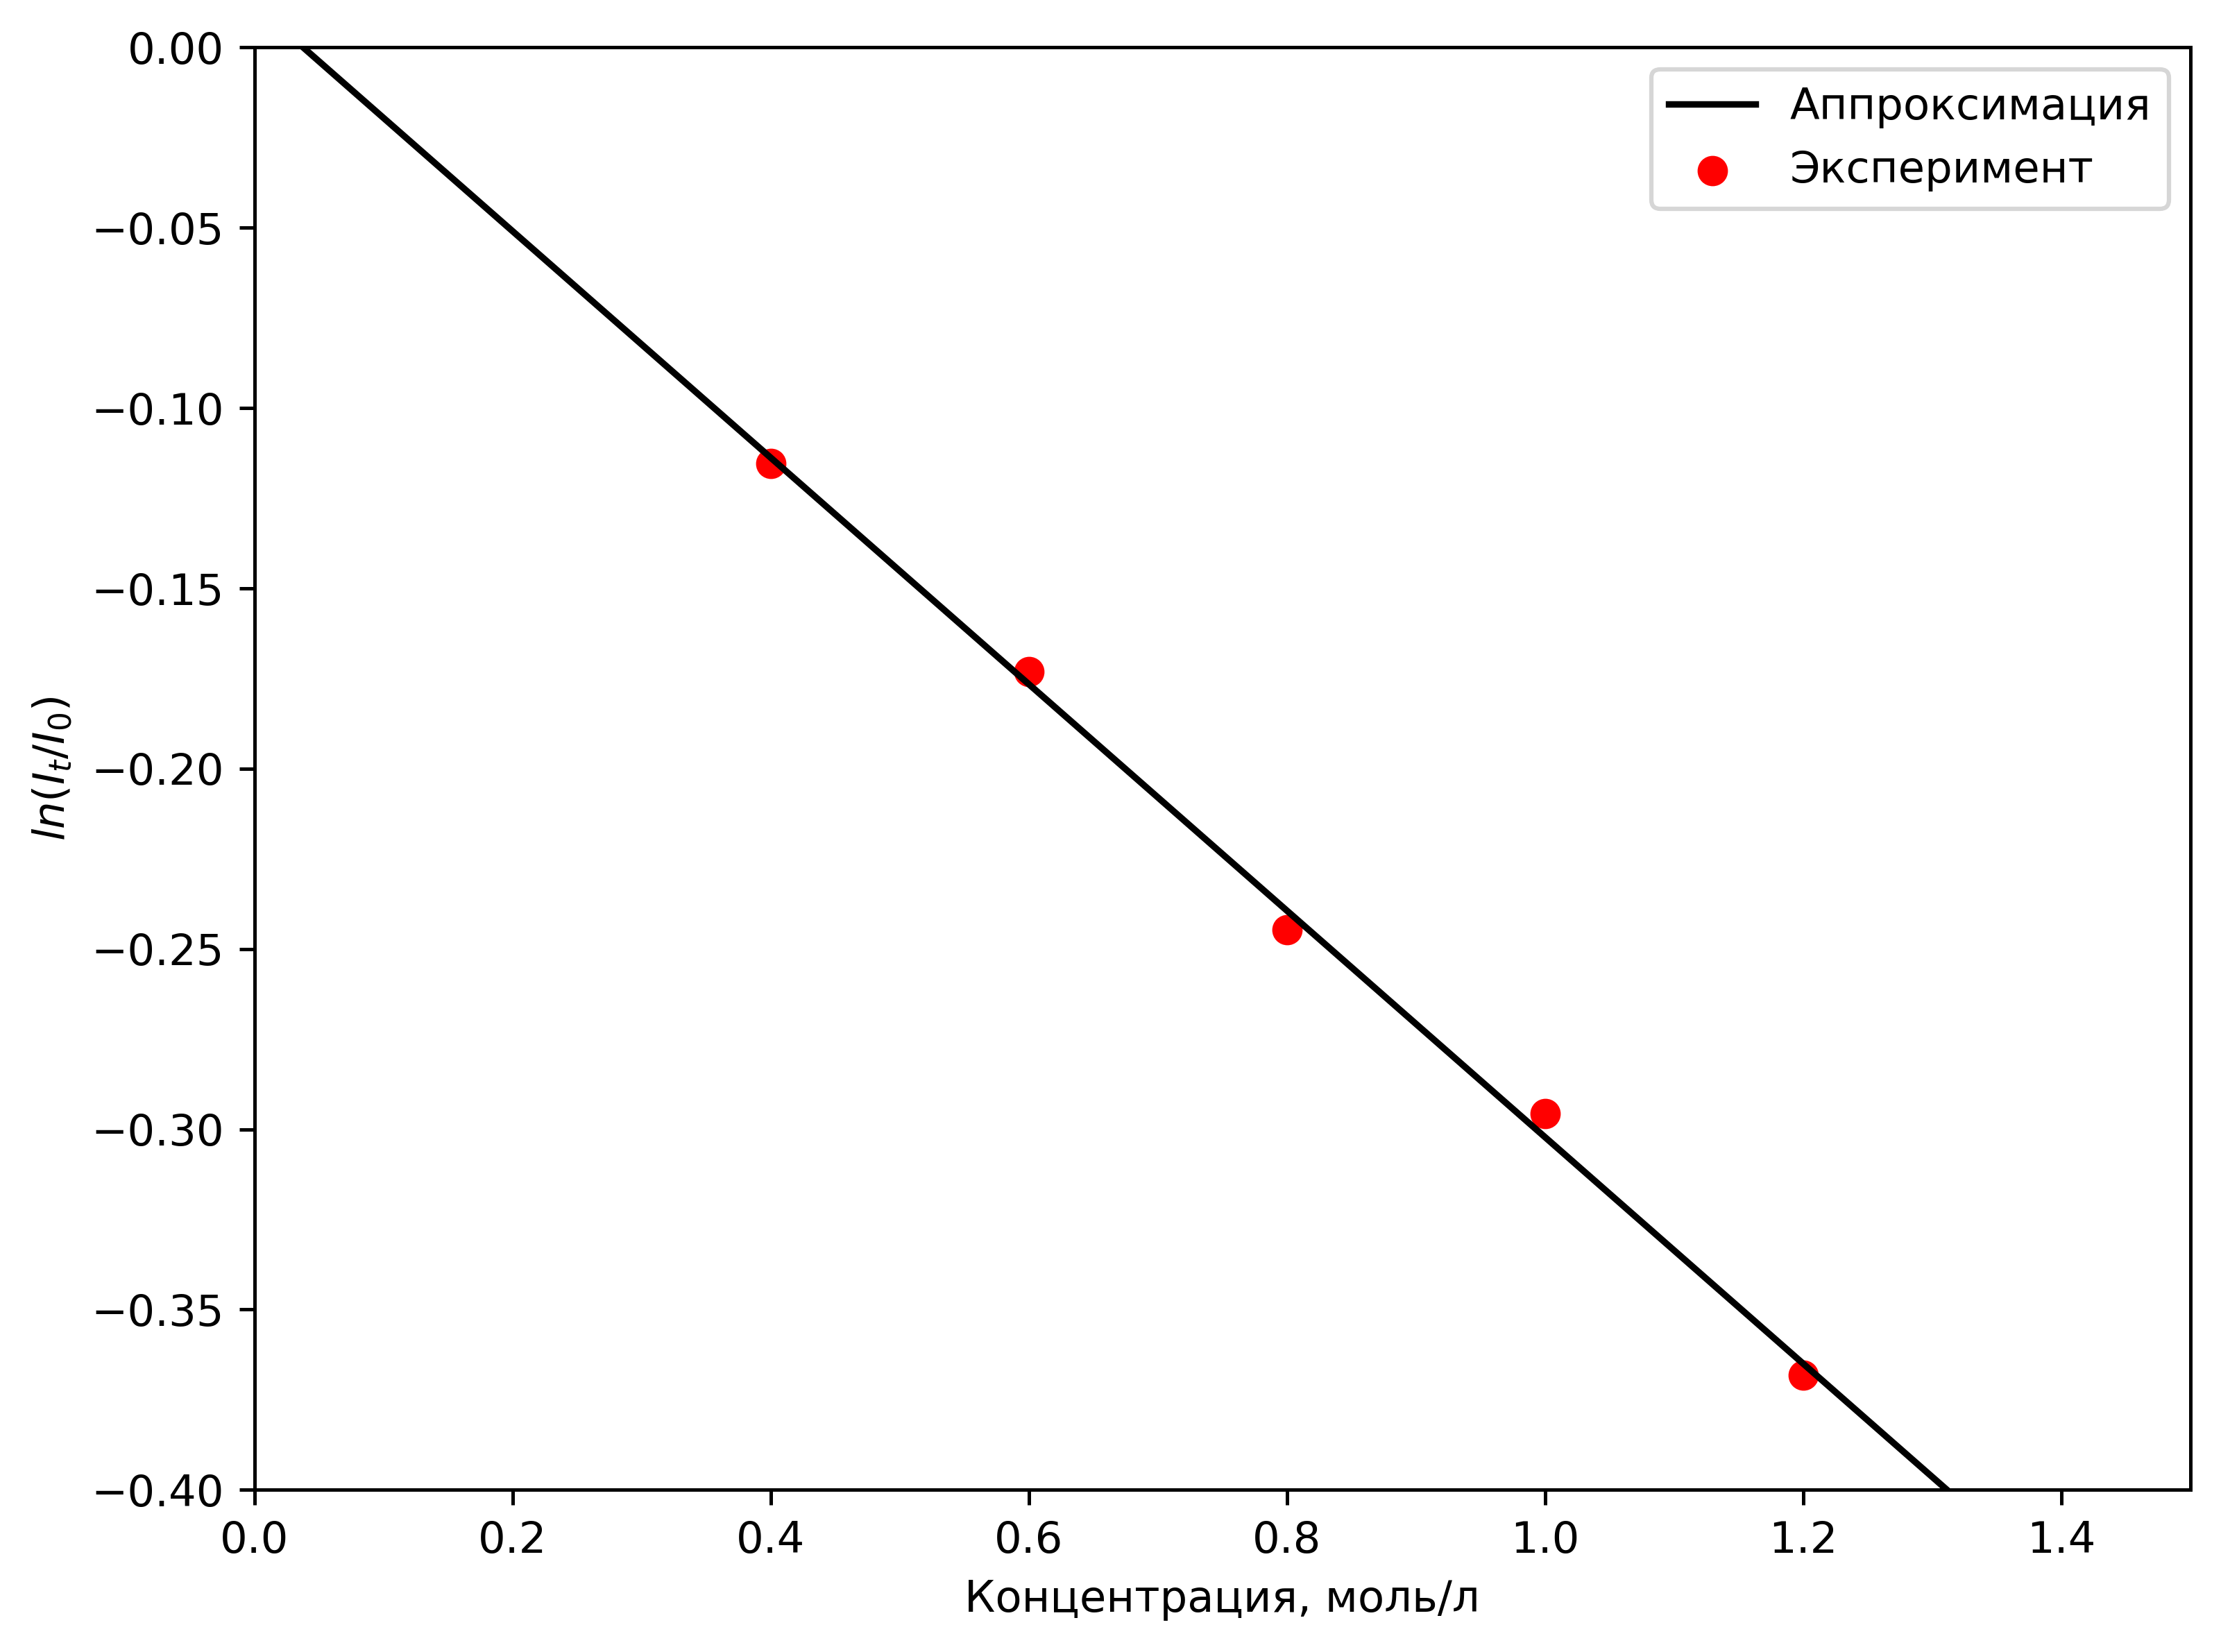

In [44]:
conc = np.array([0.4, 0.6, 0.8, 1.0, 1.2])
ratio = np.array([0.891, 0.841, 0.783, 0.744, 0.692])
ln_ratio = np.log(ratio)
l = 0.8
def linear(x, params):
  k, b = params
  return k * x + b
def residuals(params, x, y, func):
  return y - func(x, params)
res = least_squares(residuals, x0=[1, 1], args=(conc, ln_ratio, linear))
k, b = res.x
alpha = -k / l
print(f'alpha = {alpha:.2f} л/(см·моль)')
fig = plt.figure(figsize = (8,6), dpi=450)
xlim = [0, 1.5]
ax = fig.add_subplot(xlim=xlim, ylim=[-0.4, 0])
ax.plot(xlim, [k * xlim[0] + b, k * xlim[1] + b], 'k', label='Аппроксимация')
ax.scatter(conc, np.log(ratio), c='r', label='Эксперимент')
ax.legend()
ax.set_ylabel('$ln{(I_t/I_0)}$')
ax.set_xlabel('Концентрация, моль/л');